In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('dark')
plt.style.use('ggplot')

/Users/szuyaochien/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train = pd.read_csv("../../train.csv")
test = pd.read_csv("../../test.csv")

In [4]:
train.shape, test.shape

((5000, 2), (1487, 1))

## Data Preprocessing

In [5]:
import os, sys
sys.path.insert(0,os.path.dirname(os.getcwd()))
                
from src.preprocessing import formatting

In [6]:
train_df = formatting(train)

In [7]:
train_df.head()

,comment,label,category
0,"easy, very accessible",824.account-management.account-access.0,account-management
1,Just a horrible app with a sign up experience ...,824.account-management.account-access.0,account-management
2,Downloaded the latest update and it still logs...,824.account-management.account-access.0,account-management
3,Downloaded the latest update and it still logs...,824.online-experience.updates-versions.0,online-experience
4,Since latest update from Apple for the iPhone ...,824.account-management.account-access.0,account-management


## Save to SQL database

In [10]:
from sqlalchemy import create_engine, text

In [12]:
## Create engine
engine = create_engine('sqlite:///../data/data.db', echo=True)
conn = engine.connect()

2021-04-24 16:19:41,151 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-04-24 16:19:41,152 INFO sqlalchemy.engine.base.Engine ()
2021-04-24 16:19:41,153 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-04-24 16:19:41,154 INFO sqlalchemy.engine.base.Engine ()


In [13]:
## insert data to DB
pd.concat([train,test],axis=0).to_sql(name= "raw_data",
                                    con=conn,
                                    if_exists= 'append',
                                    index=False)

2021-04-24 16:19:48,867 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("raw_data")
2021-04-24 16:19:48,868 INFO sqlalchemy.engine.base.Engine ()
2021-04-24 16:19:48,870 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("raw_data")
2021-04-24 16:19:48,870 INFO sqlalchemy.engine.base.Engine ()
2021-04-24 16:19:48,872 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE raw_data (
	comment TEXT, 
	aspects TEXT
)


2021-04-24 16:19:48,873 INFO sqlalchemy.engine.base.Engine ()
2021-04-24 16:19:48,875 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-24 16:19:48,877 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-24 16:19:48,902 INFO sqlalchemy.engine.base.Engine INSERT INTO raw_data (comment, aspects) VALUES (?, ?)
2021-04-24 16:19:48,903 INFO sqlalchemy.engine.base.Engine (('easy, very accessible', "['824.account-management.account-access.0']"), ('Just a horrible app with a sign up experience from hell. You need to create some special oddball device ID thing. I i

In [16]:
train_df.to_sql(name= "train",
                con=conn,
                if_exists= 'append',
                index=False)

2021-04-24 16:19:58,817 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("train")
2021-04-24 16:19:58,818 INFO sqlalchemy.engine.base.Engine ()
2021-04-24 16:19:58,819 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("train")
2021-04-24 16:19:58,819 INFO sqlalchemy.engine.base.Engine ()
2021-04-24 16:19:58,821 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE train (
	comment TEXT, 
	label TEXT, 
	category TEXT
)


2021-04-24 16:19:58,822 INFO sqlalchemy.engine.base.Engine ()
2021-04-24 16:19:58,823 INFO sqlalchemy.engine.base.Engine COMMIT
2021-04-24 16:19:58,826 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-04-24 16:19:58,891 INFO sqlalchemy.engine.base.Engine INSERT INTO train (comment, label, category) VALUES (?, ?, ?)
2021-04-24 16:19:58,892 INFO sqlalchemy.engine.base.Engine (('easy, very accessible', '824.account-management.account-access.0', 'account-management'), ('Just a horrible app with a sign up experience from hell. You need to create some spec

In [18]:
conn.close()

## Label Analysis

In [19]:
engine = create_engine('sqlite:///../data/data.db', echo=True)
conn = engine.connect()

2021-04-24 16:20:40,270 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-04-24 16:20:40,271 INFO sqlalchemy.engine.base.Engine ()
2021-04-24 16:20:40,272 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-04-24 16:20:40,273 INFO sqlalchemy.engine.base.Engine ()


In [15]:
train_table = pd.read_sql("SELECT * FROM train", conn)

2021-04-24 15:47:25,070 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT * FROM train")
2021-04-24 15:47:25,071 INFO sqlalchemy.engine.base.Engine ()
2021-04-24 15:47:25,072 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT * FROM train")
2021-04-24 15:47:25,072 INFO sqlalchemy.engine.base.Engine ()
2021-04-24 15:47:25,073 INFO sqlalchemy.engine.base.Engine SELECT * FROM train
2021-04-24 15:47:25,074 INFO sqlalchemy.engine.base.Engine ()


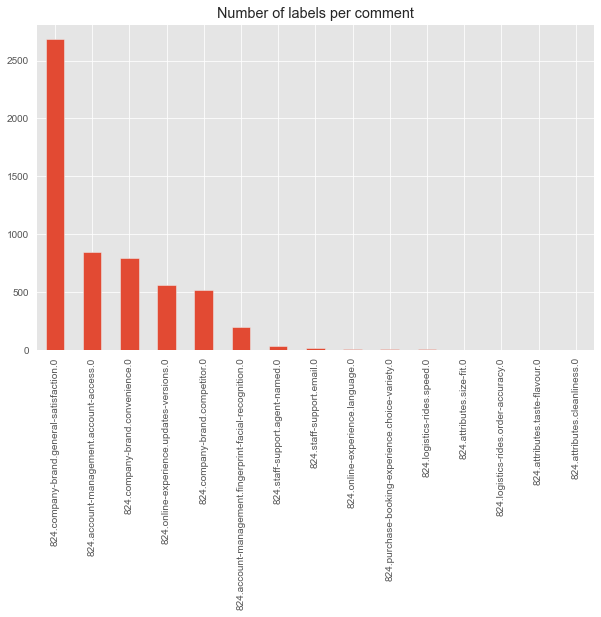

In [16]:
train_table['label'].value_counts().plot(kind='bar',title="Number of labels per comment",figsize=(10,6))

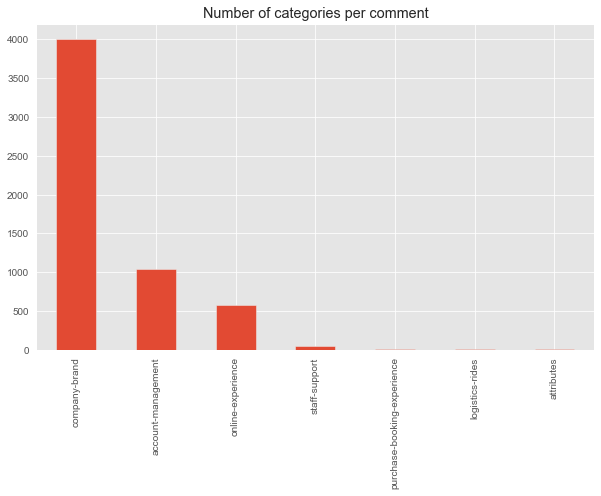

In [27]:
train_table['category'].value_counts().plot(kind='bar',title="Number of categories per comment",figsize=(10,6))

## Comment Analysis

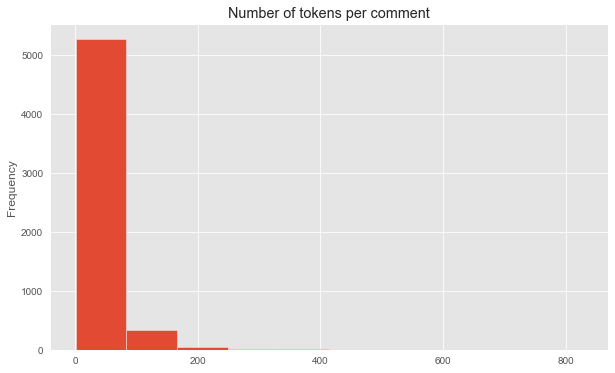

In [28]:
train_table['comment'].str.split().apply(len).plot(kind='hist',title="Number of tokens per comment",figsize=(10,6))

In [29]:
def wordcount_by_label(df,label):
    label_df = df[df["label"]==label]
    label_df['comment'].str.split().apply(len).plot(kind='hist',title=f"Number of tokens per comment ({label})",figsize=(10,6))
    plt.show()

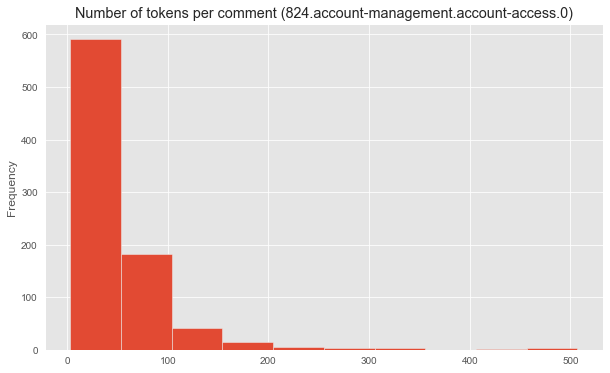

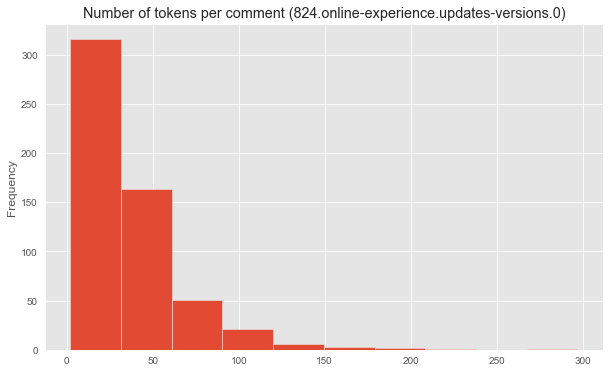

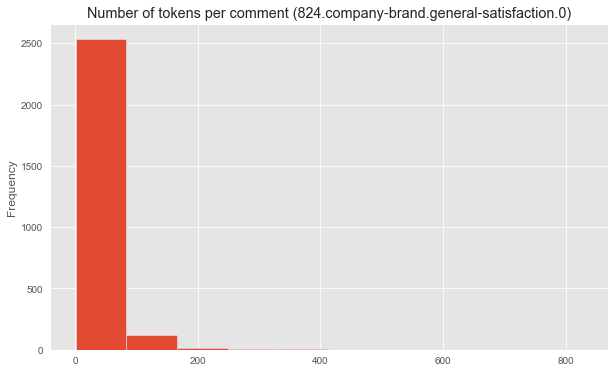

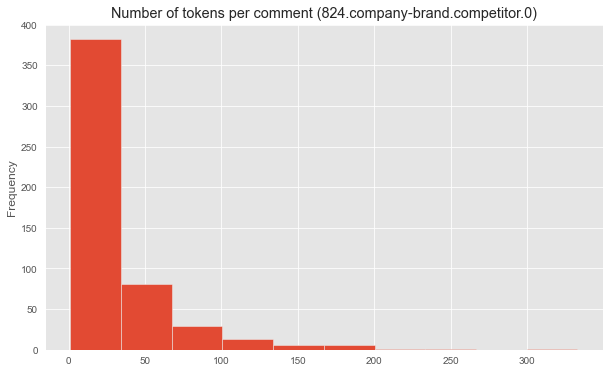

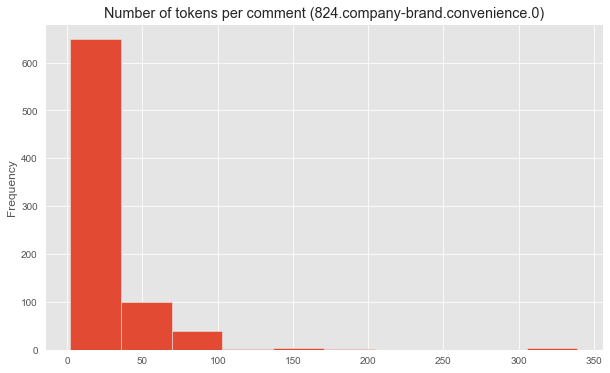

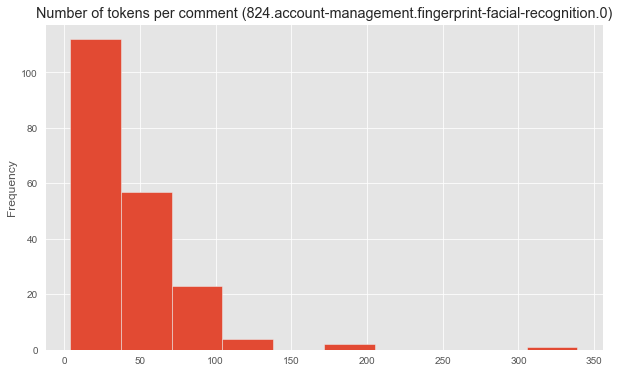

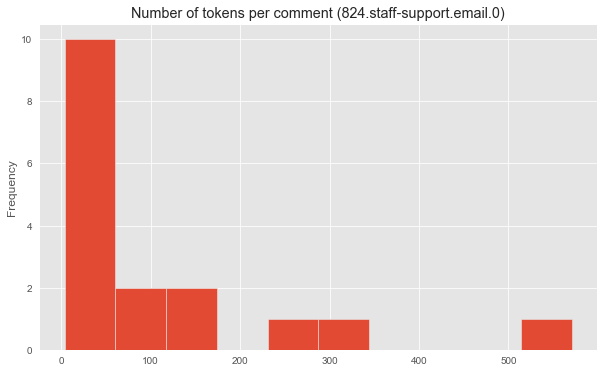

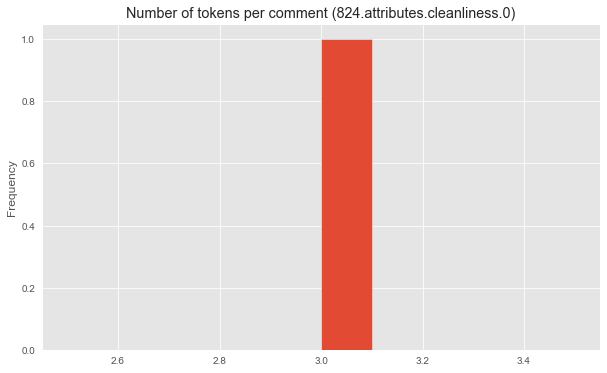

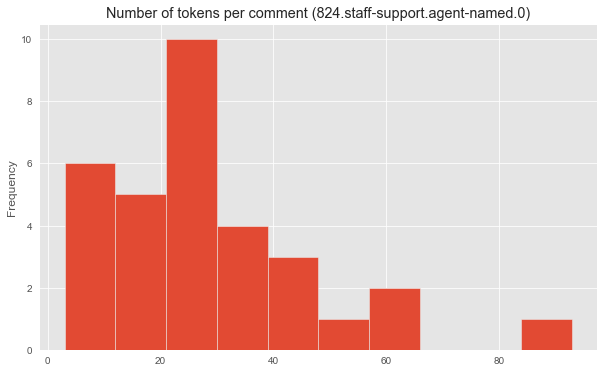

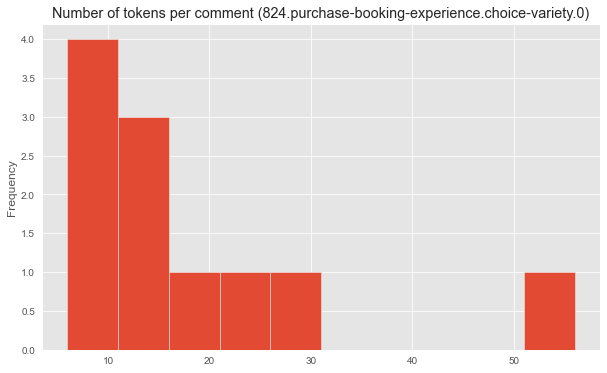

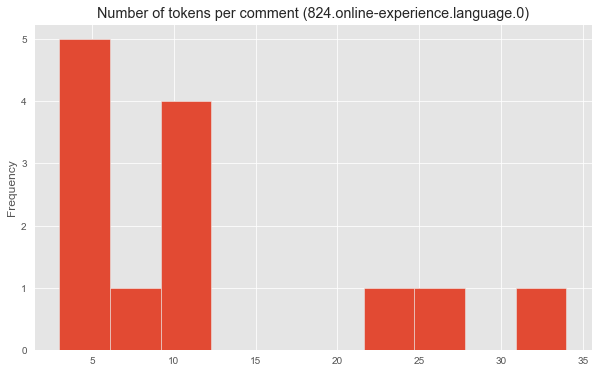

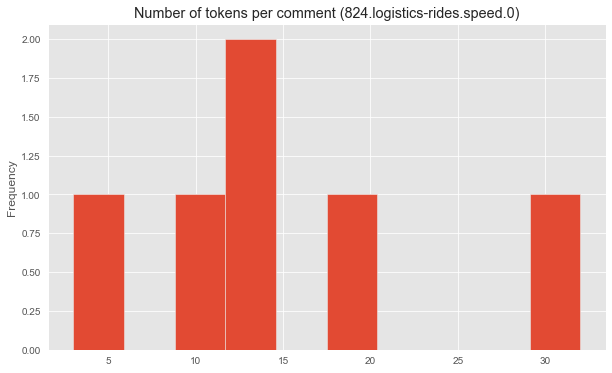

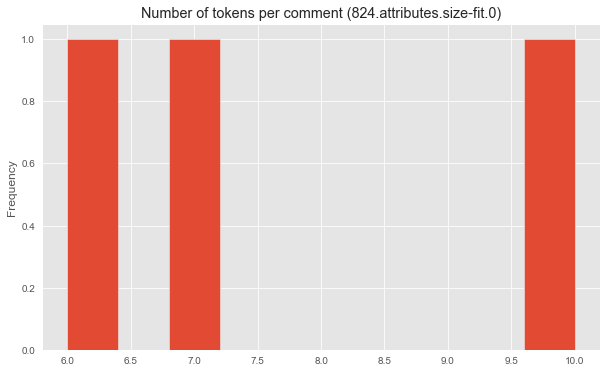

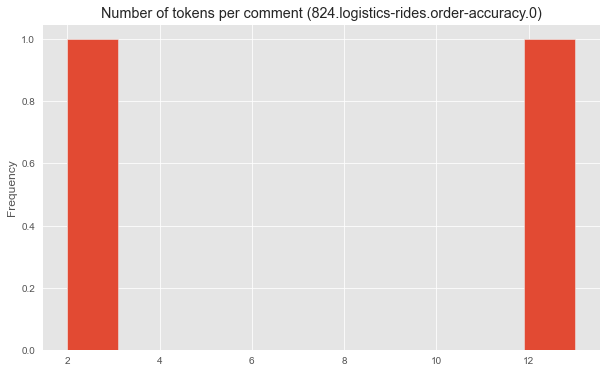

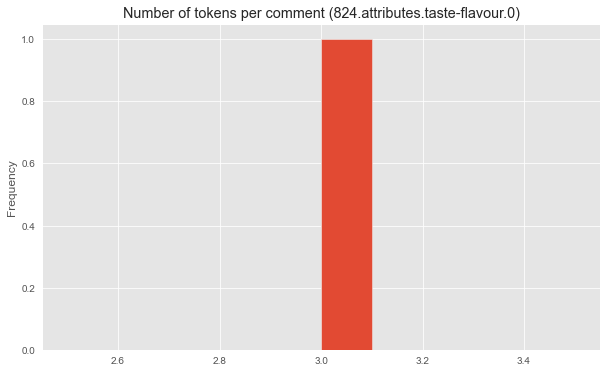

In [30]:
for lb in train_table['label'].unique():
    wordcount_by_label(train_df,lb)